# Decaimento do múon
O múon decai segundo a equação:
$$f(t)dt = A\,e^{-t/\tau}\,dt,$$
em que $\tau = 2,2$ e $A$ é a constante de normalização. Neste caso, $A = 1/\tau$.

Queremos amostrar tempos aleatórios segundo a equação de decaimento do múon. Realizando o processo de inversão:
$$t^* = \tau \; log\left(\frac{1}{1-u^*}\right),$$
em que $u^*$ é uma variável uniformemente distribuída.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [5]:
num = 1000
np.random.seed(712)
u = np.random.random_sample(num)
np.random.seed()

In [6]:
# Gera t a partir da expressão
tau = 2.2
t = (tau)*(np.log(1/(1-u)))

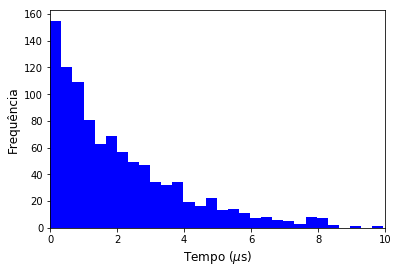

In [15]:
# Histograma
div = 50
plt.hist(t, bins = div, color = 'b')
plt.xlabel(r'Tempo ($\mu$s)', fontsize = 12)
plt.ylabel('Frequência', fontsize = 12)
plt.xlim(0,10)
plt.show()

Realmente tem um decaimento exponencial, como a função do decaimento do múon.

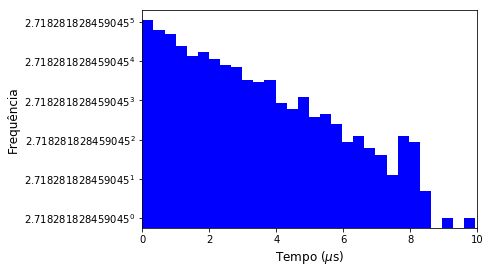

In [16]:
# Plotar em log
plt.hist(t, bins = div, color = 'b')
plt.xlabel(r'Tempo ($\mu$s)', fontsize = 12)
plt.ylabel('Frequência', fontsize = 12)
plt.yscale('log', basey = math.e)
plt.xlim(0,10)
plt.show()

Observando um comportamento linear no histograma acima, podemos traçar uma reta.

In [29]:
y_bruto, x_bruto = np.histogram(t, bins = div)

Geramos um histograma em que a primeira entrada (y) é o tamanho de cada barra do histograma e a segunda entrada (x), os bins. Como precisamos aplicar log nestes valores de y, queremos selecionar somente aqueles y > 0.
Além disso, a tendência linear aplica-se somente para os primeiros valores (t < 10).

In [44]:
x = []
y = []
for i in range(len(y_bruto)):
    if(y_bruto[i] > 0 and x_bruto[i] < 10):
        x.append((x_bruto[i]))
        y.append(np.log(y_bruto[i]))
        
x = np.array(x)
y = np.array(y)

In [45]:
# Faz o ajuste polinomial de grau 1 com x e y
coef = np.polyfit(x, y, 1)
pol = np.poly1d(coef)
func = str(pol)
print(func)

 
-0.4884 x + 5.035


In [42]:
# Calcula y pelo ajuste
y_ajuste = pol(x)

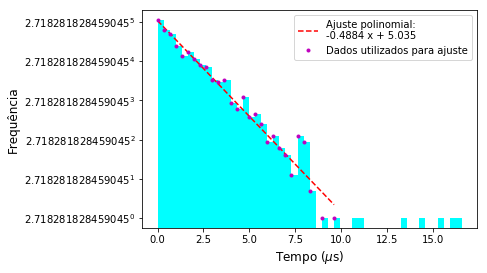

In [47]:
# Faz o histograma de t
plt.hist(t, bins = div, color = '#00FFFF')
# Plota a reta com x e y_ajuste
plt.plot(x, np.exp(y_ajuste), '--', color = 'r', label = 'Ajuste polinomial:'+func)
# Plota os pontos que foram utilizados
plt.plot(x, np.exp(y), '.', color = 'm', label = 'Dados utilizados para ajuste')
plt.xlabel(r'Tempo ($\mu$s)', fontsize = 12)
plt.ylabel('Frequência', fontsize = 12)
plt.yscale('log', basey = math.e)
plt.legend(fontsize = 10)
plt.show()